<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826161 sha256=248dc1445b24c2889cd146233893bd8233925222a081be231bd1cbaa127c6351
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436506 sha256=5afa553ef1717c72f2561deac39c43525325ec1d486b578d0497c6492913ef77
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [547]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-ETC", interval="minute15", count=405)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                        open     high      low    close        volume  \
2023-04-09 08:45:00  27050.0  27060.0  27000.0  27020.0   8625.548574   
2023-04-09 09:00:00  27010.0  27070.0  26920.0  27020.0  21863.009987   
2023-04-09 09:15:00  27020.0  27070.0  27000.0  27030.0   5161.065258   
2023-04-09 09:30:00  27040.0  27060.0  27000.0  27040.0   9340.669267   
2023-04-09 09:45:00  27060.0  27090.0  27040.0  27070.0   6353.370715   
...                      ...      ...      ...      ...           ...   
2023-04-13 12:45:00  28900.0  28920.0  28800.0  28850.0  22680.290362   
2023-04-13 13:00:00  28850.0  28850.0  28780.0  28790.0  15292.737199   
2023-04-13 13:15:00  28790.0  28830.0  28740.0  28830.0  14408.088861   
2023-04-13 13:30:00  28830.0  28870.0  28800.0  28840.0   6987.542225   
2023-04-13 13:45:00  28840.0  28870.0  28830.0  28860.0   5064.791085   

                            value  
2023-04-09 08:45:00  2.331117e+08  
2023-04-09 09:00:00  5.901009e+08  
2023-04-09 09:1

In [548]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-09 08:45:00,27020.0
1,2023-04-09 09:00:00,27020.0
2,2023-04-09 09:15:00,27030.0
3,2023-04-09 09:30:00,27040.0
4,2023-04-09 09:45:00,27070.0
...,...,...
400,2023-04-13 12:45:00,28850.0
401,2023-04-13 13:00:00,28790.0
402,2023-04-13 13:15:00,28830.0
403,2023-04-13 13:30:00,28840.0


In [549]:
#prophet 불러옴
from fbprophet import Prophet

In [550]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [551]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=8, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


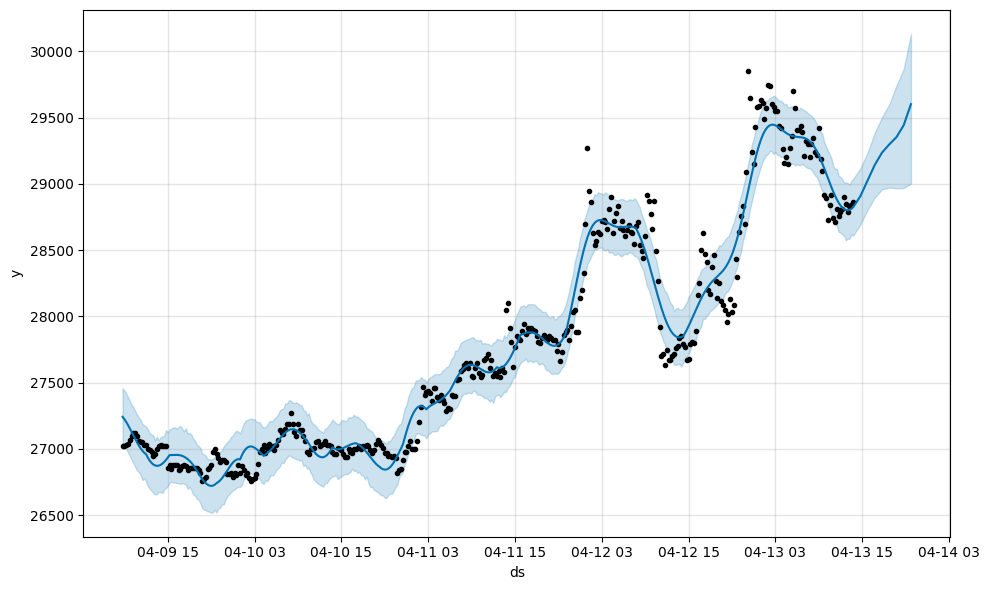

In [553]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


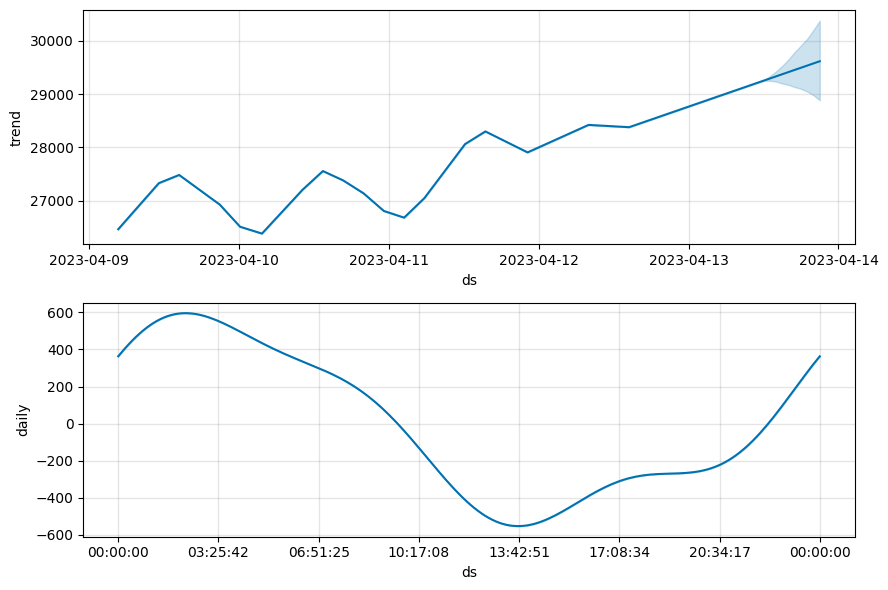

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive


KeyboardInterrupt: ignored